In [1]:
import pandas as pd
import numpy as np

Dataset link: https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

## Loading the data set

In [2]:
!unzip '/content/drive/MyDrive/flight_fare_dataset.zip'

Archive:  /content/drive/MyDrive/flight_fare_dataset.zip
  inflating: Data_Train.xlsx         
  inflating: Sample_submission.xlsx  
  inflating: Test_set.xlsx           


In [3]:
df= pd.DataFrame(pd.read_excel("/content/Data_Train.xlsx"))
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.drop(['Additional_Info', 'Duration'], axis=1, inplace=True)

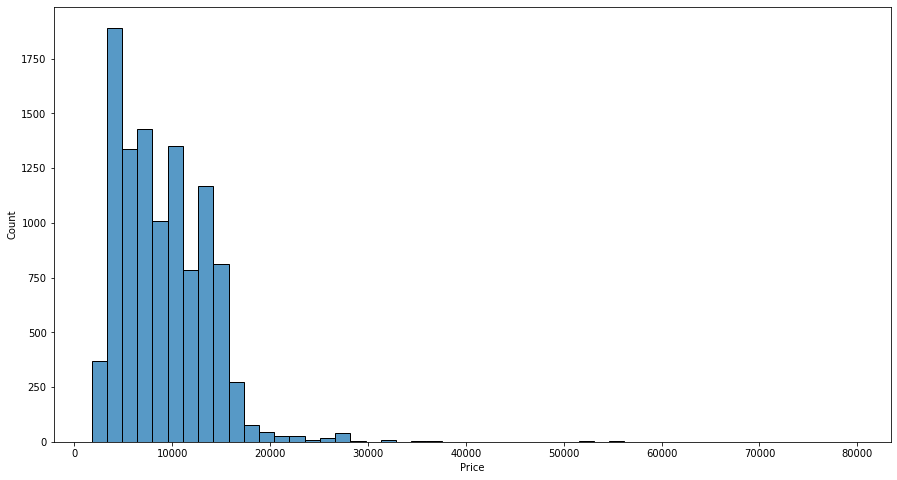

In [7]:
# Histplot of price column

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15 , 8))
sns.histplot(data = df , x = "Price" , bins = 50)

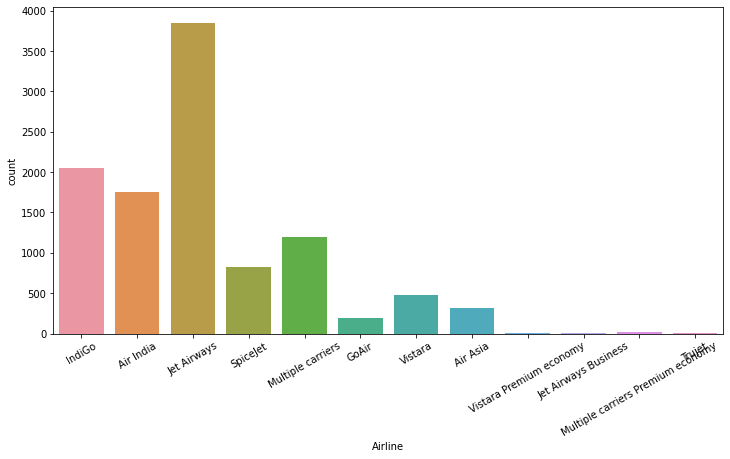

In [8]:
plt.figure(figsize = (12 , 6))
sns.countplot(data = df , x = df.Airline)
plt.xticks(rotation = 30)
plt.show()

##Removing Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, Trujet as they only account for 0.23% of the dataset

In [9]:

#df['Airline'].drop(['Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy', 'Trujet'], inplace=True)
df = df[df.Airline != 'Multiple carriers Premium economy']
df = df[df.Airline != 'Jet Airways Business']
df = df[df.Airline != 'Vistara Premium economy']
df = df[df.Airline != 'Trujet']

In [10]:
df['Month']=1
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,4107,1
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,4145,1
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,7229,1
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,12648,1


## Separating Date and month

In [11]:
for i in range(df.shape[0]):
  if(len(df['Date_of_Journey'].iloc[i])==9):
    df['Month'].iloc[i] = df['Date_of_Journey'].iloc[i][2:4]
  else:
    df['Month'].iloc[i] = df['Date_of_Journey'].iloc[i][3:5]

for j in range(df.shape[0]):
  temp = df['Date_of_Journey'].iloc[j][0:2]
  if(temp[1]=='/'):
    df['Date_of_Journey'].iloc[j] = int(df['Date_of_Journey'].iloc[j][0:1])
  else:
    df['Date_of_Journey'].iloc[j] = int(df['Date_of_Journey'].iloc[j][0:2])

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,03
1,Air India,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,05
2,Jet Airways,9,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,06
3,IndiGo,12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,05
4,IndiGo,1,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,03
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,4107,04
10679,Air India,27,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,4145,04
10680,Jet Airways,27,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,7229,04
10681,Vistara,1,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,12648,03


In [12]:
df.rename({'Date_of_Journey':'Date'}, axis=1, inplace=True)

In [13]:
df.drop(columns='Route', inplace=True)
df

,Airline,Date,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Month
0,IndiGo,24,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,03
1,Air India,1,Kolkata,Banglore,05:50,13:15,2 stops,7662,05
2,Jet Airways,9,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,06
3,IndiGo,12,Kolkata,Banglore,18:05,23:30,1 stop,6218,05
4,IndiGo,1,Banglore,New Delhi,16:50,21:35,1 stop,13302,03
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,Kolkata,Banglore,19:55,22:25,non-stop,4107,04
10679,Air India,27,Kolkata,Banglore,20:45,23:20,non-stop,4145,04
10680,Jet Airways,27,Banglore,Delhi,08:20,11:20,non-stop,7229,04
10681,Vistara,1,Banglore,New Delhi,11:30,14:10,non-stop,12648,03


## Converting arr. time and dep. time to respective timestamps

In [14]:
from datetime import timedelta
def convert_date(time):
  h = time[0:5]
  delta = timedelta(hours=int(h.split(':')[0]), minutes=int(h.split(':')[1]))
  return (delta.total_seconds()/60)


df['Dep_Time'] = df['Dep_Time'].apply(convert_date)
df['Arrival_Time'] = df['Arrival_Time'].apply(convert_date)

In [15]:
s = '2h 50m'
s[:-1]

'2h 50'

In [16]:
def stop(stops):
  if('no' in stops):
    return 0
  else:
    return int(stops[0])

df['Total_Stops'] = df['Total_Stops'].apply(stop)

In [17]:
df

,Airline,Date,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Month
0,IndiGo,24,Banglore,New Delhi,1340.0,70.0,0,3897,03
1,Air India,1,Kolkata,Banglore,350.0,795.0,2,7662,05
2,Jet Airways,9,Delhi,Cochin,565.0,265.0,2,13882,06
3,IndiGo,12,Kolkata,Banglore,1085.0,1410.0,1,6218,05
4,IndiGo,1,Banglore,New Delhi,1010.0,1295.0,1,13302,03
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,Kolkata,Banglore,1195.0,1345.0,0,4107,04
10679,Air India,27,Kolkata,Banglore,1245.0,1400.0,0,4145,04
10680,Jet Airways,27,Banglore,Delhi,500.0,680.0,0,7229,04
10681,Vistara,1,Banglore,New Delhi,690.0,850.0,0,12648,03


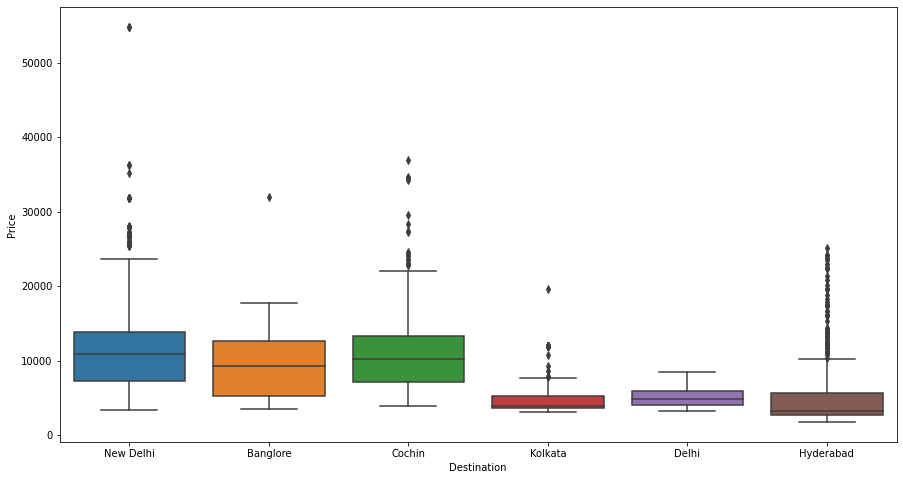

In [18]:
#visualization
plt.figure(figsize=(15,8))
sns.boxplot(x = df.Destination , y = df.Price, data = df.sort_values('Price', ascending = False))

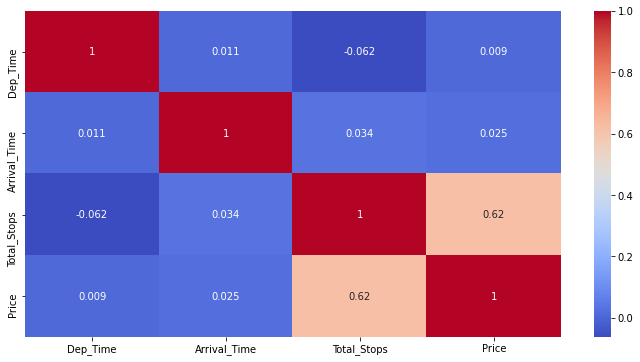

In [19]:
#Correlation heatmap
plt.figure(figsize = (12 , 6))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

##The correlation is not that high so we can proceed with the dataset

## Creating dummy variables to handle categorical values

In [20]:
df=pd.get_dummies(df, columns=['Airline', 'Destination', 'Source'])
df

,Date,Dep_Time,Arrival_Time,Total_Stops,Price,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,24,1340.0,70.0,0,3897,03,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,350.0,795.0,2,7662,05,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,9,565.0,265.0,2,13882,06,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,12,1085.0,1410.0,1,6218,05,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,1010.0,1295.0,1,13302,03,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,1195.0,1345.0,0,4107,04,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10679,27,1245.0,1400.0,0,4145,04,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10680,27,500.0,680.0,0,7229,04,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
10681,1,690.0,850.0,0,12648,03,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


## Splitting the dataset into train and test sts

In [21]:
df.shape

(10659, 25)

In [22]:
from sklearn.model_selection import train_test_split

X = df.copy()
X.drop('Price', axis=1, inplace=True)

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Creating linear regressor model to check for the accuracy

In [44]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predictions =  reg.predict(X_test)
print("R-squared (The higher the better): ",r2_score(y_test,y_predictions))
print("Mean squared error (The lower the better): ", (mean_squared_error(y_test, y_predictions))/10000000)

R-squared (The higher the better):  0.5929329351622301
Mean squared error (The lower the better):  0.8108915132376259


## Creating Random Forest regressor to check for the accuracy

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
print("R-squared (The higher the better): ",r2_score(y_test,y_pred))
print("Mean squared error (The lower the better): ", (mean_squared_error(y_test, y_pred))/10000000)

R-squared (The higher the better):  0.7850478531862202
Mean squared error (The lower the better):  0.4281920269648144


## Since Random Forest's accuracy is better than Linear Regressor's, we'll save and use Random Forest regressor for regression

In [27]:
import joblib
joblib.dump(reg_rf, "random_forest1.joblib")

['random_forest1.joblib']